```
An open acre will become filled with trees if three or more adjacent acres contained trees. 
Otherwise, nothing happens.

An acre filled with trees will become a lumberyard if three or more adjacent acres were lumberyards. 
Otherwise, nothing happens.

An acre containing a lumberyard will remain a lumberyard if it was adjacent to at least 
one other lumberyard and at least one acre containing trees. Otherwise, it becomes open.
```

In [1]:
import matplotlib.pyplot as plt

data = open('data/day18.data','r').read().split('\n')

In [2]:
GROUND = '.'
TREE  = '|'
LUMBERYARD = '#'

print('ground: ', GROUND)
print('trees:  ', TREE)
print('lumbery:', LUMBERYARD)

ground:  .
trees:   |
lumbery: #


In [3]:
TREE_FILTER =  [ [' ', TREE, ' ' ] , [TREE,' ',TREE] , [' ',TREE,' '] ]
LUMBER_FILTER = [ [' ', LUMBERYARD, ' '] , [LUMBERYARD,' ',LUMBERYARD] , [' ', LUMBERYARD, ' ']]

In [4]:
print('if ground and three trees around:', GROUND, '->', TREE)
for line in TREE_FILTER:
    print(line)

if ground and three trees around: . -> |
[' ', '|', ' ']
['|', ' ', '|']
[' ', '|', ' ']


In [5]:
print('if tree and three lubers around:', TREE, '-> ', LUMBERYARD)
for line in LUMBER_FILTER:
    print(line)

if tree and three lubers around: | ->  #
[' ', '#', ' ']
['#', ' ', '#']
[' ', '#', ' ']


In [6]:
print('a lumberyard remains a lumberyard if there is at least one lumberyard and at least one tree adjacent', LUMBERYARD, '->', GROUND)

a lumberyard remains a lumberyard if there is at least one lumberyard and at least one tree adjacent # -> .


In [7]:
print(len(data))
for line in data:
    print(line, len(line))

52
0000000000000000000000000000000000000000000000000000 52
0#.|#||..#......##.#||..||....|.#.|.#...#.|..|||.|.0 52
0.#..#||..#...##|.|##|..#|..##..#.|...|..|.|##.....0 52
0.#|..#..|||.|.|...|..##|.|...|.......|..#.|.#.|...0 52
0|....##..#|.........||#|.|.#....#.|.#.#|......#|.#0 52
0|.#.|....|.|.#..##|..|...##...|....|.|..##..|.#.#|0 52
0...|.|...|....|###.....|.##.#...#........|........0 52
0||..||.#|.|.#.|...#....#.#..|#|#.###.|.|...|...|#.0 52
0|..|..#..#|....#|...##...#.||..#..#.|.|...#...|.|#0 52
0..#...|....|..|.|##...#.#.|#..#.|...#.#..#..#.#.|.0 52
0|#.|##.#....#.|.|||#.|#...#|.|#|#.###....|..|.|...0 52
0..||#..#..#.|.#...#.#..|.|...|.##|..|...#||....|..0 52
0||.|......|.#...##|..#.|.....##|.#..#.||...|.#|.|.0 52
0#...|....|..#.....|.#....||#||..|...#||........|#.0 52
0|.|....#...#|..#.....#..|..||#..|...#..|...#|.#...0 52
0..#|.#.##||#|.#...|...|...#.#||.....#|.|.|.|#|.|..0 52
0|..|#..|#...#..|#.|.#..|.#.#|...|.......##.|..##..0 52
0##..#|.#||......#...|..#.|.|..#.#...|.......

In [8]:
def checkAdjacent(data, sort):
    ret = []
    ret.clear()
    for y in range(52):
        ret.append([])
    for y in range(52):
        ret[y] = []
        for x in range(52):
            sortFound = 0
            try:
                if data[y-1][x] == sort:
                    sortFound += 1
                if data[y+1][x] == sort:
                    sortFound += 1
                if data[y][x-1] == sort:
                    sortFound += 1
                if data[y][x+1] == sort:
                    sortFound += 1
                if data[y-1][x-1] == sort:
                    sortFound += 1
                if data[y+1][x+1] == sort:
                    sortFound += 1
                if data[y+1][x-1] == sort:
                    sortFound += 1
                if data[y-1][x+1] == sort:
                    sortFound += 1
            except:
                pass
            if sortFound >= 3:
                ret[y].append(sort)
            else:
                ret[y].append('.')
    return ret

In [9]:
def checkLumberYard(data):
    ret = []
    ret.clear()
    for y in range(52):
        ret.append([])
        
    for y in range(52):
        ret[y] = []
        for x in range(52):
            treesfound = 0
            lumberfound = 0
            try:
                if data[y-1][x] == TREE:
                    treesfound += 1
                if data[y+1][x] == TREE:
                    treesfound += 1
                if data[y][x-1] == TREE:
                    treesfound += 1
                if data[y][x+1] == TREE:
                    treesfound += 1
                if data[y-1][x-1] == TREE:
                    treesfound += 1
                if data[y+1][x+1] == TREE:
                    treesfound += 1
                if data[y+1][x-1] == TREE:
                    treesfound += 1
                if data[y-1][x+1] == TREE:
                    treesfound += 1
                
                if data[y-1][x] == LUMBERYARD:
                    lumberfound += 1
                if data[y+1][x] == LUMBERYARD:
                    lumberfound += 1
                if data[y][x-1] == LUMBERYARD:
                    lumberfound += 1
                if data[y][x+1] == LUMBERYARD:
                    lumberfound += 1   
                if data[y-1][x-1] == LUMBERYARD:
                    lumberfound += 1
                if data[y+1][x+1] == LUMBERYARD:
                    lumberfound += 1
                if data[y+1][x-1] == LUMBERYARD:
                    lumberfound += 1
                if data[y-1][x+1] == LUMBERYARD:
                    lumberfound += 1   
            except:
                pass
            if treesfound >= 1 and lumberfound >= 1:
                ret[y].append('#')
            else:
                ret[y].append('.')
    return ret

In [10]:
def printBoard(data):
    wooded = 0
    lumbered = 0
    for line in data:
        wooded += line.count(TREE)
        lumbered += line.count(LUMBERYARD)
        print("".join(str(x) for x in line) )  

In [11]:
def calcResource(data):
    wooded = 0
    lumbered = 0
    for line in data:
        wooded += line.count(TREE)
        lumbered += line.count(LUMBERYARD)
    return wooded * lumbered

In [12]:
dataX = list()
dataY = list()

for i in range(1000):
    
    trees = checkAdjacent(data, TREE)
    stayLumber = checkLumberYard(data)
    lumber = checkAdjacent(data, LUMBERYARD)

    total  = []
    for y in range(52):
        total.append([])
    for y in range(52):
        total[y] = []
        for x in range(52):
            if lumber[y][x] != GROUND and data[y][x] == TREE:
                total[y].append(LUMBERYARD)
            elif trees[y][x] != GROUND and data[y][x] == GROUND:
                total[y].append(TREE)
            else:
                if data[y][x] == LUMBERYARD and stayLumber[y][x] != LUMBERYARD:
                    total[y].append(GROUND)
                else:                           
                    total[y].append(data[y][x])

    data = list(total)
    dataX.append(i)
    dataY.append(calcResource(data))

[193556, 191100, 193192, 192508, 194622, 193844, 194948, 193522, 195546, 196578, 199924, 202520, 202335, 205920, 211636, 215604, 221964, 225400, 229120, 227484, 228513, 227601, 227180, 221301, 215715, 204276, 199044, 195305]


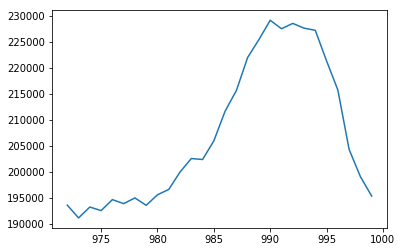

In [13]:
pattern = dataY[-28:]
print(pattern)
plt.plot(dataX[-28:], pattern)

In [14]:
stepsLeft = 1000000000 - 1000 - 1

In [15]:
print(stepsLeft)

999998999


In [16]:
resultIndex = stepsLeft%28

In [17]:
print(resultIndex, 'result is:', pattern[resultIndex])

27 result is: 195305
